In [ ]:
import nltk
import pandas as pd

In [ ]:
text = ['This is what we are learning from topmentor##$$', 'in this article, I will be explaining various data cleaning techniques', 'stay tuned for this further we will learn more &&&', 'I do not like the product, which he was talking']
text
df = pd.DataFrame({'text':text})

In [ ]:
df

,text
0,This is what we are learning from topmentor##$$
1,"in this article, I will be explaining various ..."
2,stay tuned for this further we will learn more...
3,"I do not like the product, which he was talking"


In [ ]:
df['lower'] = df['text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df

,text,lower
0,This is what we are learning from topmentor##$$,this is what we are learning from topmentor##$$
1,"in this article, I will be explaining various ...","in this article, i will be explaining various ..."
2,stay tuned for this further we will learn more...,stay tuned for this further we will learn more...
3,"I do not like the product, which he was talking","i do not like the product, which he was talking"


In [ ]:
import string
import re

In [ ]:
df.lower.apply(lambda x: "".join(i for i in x if i not in string.punctuation))   ###tokenizing using string

0          this is what we are learning from topmentor
1    in this article i will be explaining various d...
2      stay tuned for this further we will learn more 
3       i do not like the product which he was talking
Name: lower, dtype: object

In [ ]:
df['Clean_Text'] = df.lower.apply(lambda x: ''.join(re.findall(r'[a-zA-Z+" "]',x))) ### tokenizing using re

In [ ]:
df

,text,lower,Clean_Text
0,This is what we are learning from topmentor##$$,this is what we are learning from topmentor##$$,this is what we are learning from topmentor
1,"in this article, I will be explaining various ...","in this article, i will be explaining various ...",in this article i will be explaining various d...
2,stay tuned for this further we will learn more...,stay tuned for this further we will learn more...,stay tuned for this further we will learn more
3,"I do not like the product, which he was talking","i do not like the product, which he was talking",i do not like the product which he was talking


In [ ]:
### stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df['New_Text'] = df.Clean_Text.apply(lambda x:" ".join(i for i in x.split() if i not in all_stopwords))

In [ ]:
df

,text,lower,Clean_Text,New_Text
0,This is what we are learning from topmentor##$$,this is what we are learning from topmentor##$$,this is what we are learning from topmentor,learning topmentor
1,"in this article, I will be explaining various ...","in this article, i will be explaining various ...",in this article i will be explaining various d...,article explaining various data cleaning techn...
2,stay tuned for this further we will learn more...,stay tuned for this further we will learn more...,stay tuned for this further we will learn more,stay tuned learn
3,"I do not like the product, which he was talking","i do not like the product, which he was talking",i do not like the product which he was talking,like product talking


In [ ]:
### stemming
from nltk.stem import PorterStemmer

In [ ]:
st = PorterStemmer()

In [ ]:
df.New_Text.apply(lambda x: " ".join(st.stem(word) for word in x.split()))

0                              learn topmentor
1    articl explain variou data clean techniqu
2                              stay tune learn
3                            like product talk
Name: New_Text, dtype: object

In [ ]:
#### lemmitization - cuts out but finds the actual meaning and then only cuts off and even if it will find the meaning of the rooot word


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
df['Processed'] = df.New_Text.apply(lambda x: " ".join(lm.lemmatize(word) for word in x.split()))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df

,text,lower,Clean_Text,New_Text,Processed
0,This is what we are learning from topmentor##$$,this is what we are learning from topmentor##$$,this is what we are learning from topmentor,learning topmentor,learning topmentor
1,"in this article, I will be explaining various ...","in this article, i will be explaining various ...",in this article i will be explaining various d...,article explaining various data cleaning techn...,article explaining various data cleaning techn...
2,stay tuned for this further we will learn more...,stay tuned for this further we will learn more...,stay tuned for this further we will learn more,stay tuned learn,stay tuned learn
3,"I do not like the product, which he was talking","i do not like the product, which he was talking",i do not like the product which he was talking,like product talking,like product talking


In [ ]:
### EDA - Exploratory Data Analysis
all_words = []
for i in df['Processed']:
  all_words.extend(i.split())

In [ ]:
print(all_words)

['learning', 'topmentor', 'article', 'explaining', 'various', 'data', 'cleaning', 'technique', 'stay', 'tuned', 'learn', 'like', 'product', 'talking']


In [ ]:
k = nltk.FreqDist(all_words)

In [ ]:
k.keys()

dict_keys(['learning', 'topmentor', 'article', 'explaining', 'various', 'data', 'cleaning', 'technique', 'stay', 'tuned', 'learn', 'like', 'product', 'talking'])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
words = []
for message in df['Processed']:
  words.extend([word for word in message.split()])

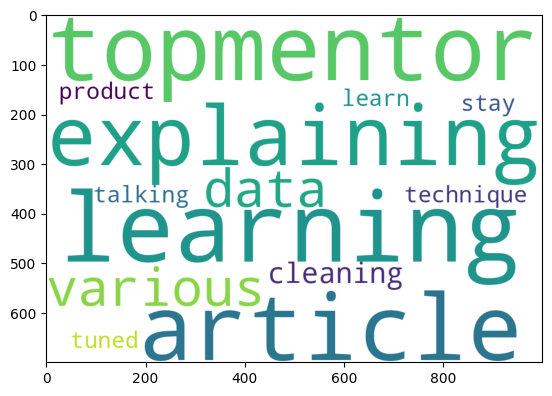

In [ ]:
wordcloud = WordCloud(width = 1000, height = 700, background_color='white').generate(" ".join(words))
plt.imshow(wordcloud)
plt.show()

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
wiki = TextBlob("Pyhton is a high-level, general-purpose programming language.")

In [ ]:
wiki.tags

[('Pyhton', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN')]

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True